In [1]:
# Parameters
MSA_MARKET = "Austin"
BRAND_MSA = "Austin, TX"


In [2]:
import pandas as pd
import datetime as dt
import numpy as np
from snowflake.connector.pandas_tools import write_pandas
import snowflake.connector
import os



In [3]:
# Import the function from your external script
from IOS_query import run_snowflake_query

# Run the query and get the results as a DataFrame
ios_df = run_snowflake_query()

# Display the DataFrame
ios_df.head()

Initiating login request with your identity provider. A browser window should have opened for you to complete the login. If you can't see it, check existing browser windows, or your OS settings. Press CTRL+C to abort and try again...
Going to open: https://justworks.cloudflareaccess.com/cdn-cgi/access/sso/saml/d74bc06bca5abf66677a16a11e6235e70f0ac75f0e462ccdea97b5bcb5cab993?SAMLRequest=lZNbb%2BMgEIX%2FisU%2B22DHlxolqXJR1EjtNpvLXvqGMU7Z2OAyuG7%2F%2FZKkkbpatdK%2BoeEc%2BGYODK9fmtp7FgakViMUBgR5QnFdSrUfod124V8hDyxTJau1EiP0KgBdj4fAmrqlk84%2BqrV46gRYzx2kgJ42RqgzimoGEqhijQBqOd1M7m5pFBDaGm011zV6Z%2FncwQCEsY7wYilBOrxHa1uKcd%2F3QT8ItNnjiBCCSY6d6ij5ctG%2FuJ4%2B0IeYxEe9Uzj56o1tKtV5BJ9hFWcR0JvtduWv7jdb5E0uqDOtoGuE2QjzLLnYrW%2FPAOAIfndge20O4DdMqgCU7quaHQTXTdtZd2TgVrgSJa71Xrqul%2FMRag%2ByTH78hDZhefEklw%2FNYr6bz27u7K%2BtOIin9luyLpbTcJqrK1L1HHnfL7FGx1iXAJ1YqmOY1pVIFPth6EfhNiJ0ENM4D7I4fEDe3IUpFbMn5z%2FEAa91VzpaIxjnAuCEykvl873E5xIG0PiYKi6zuOAkLThLWFGlaZplLExZGIo0GiQiIxVhPEsqIuI04rwULM%2BKpOBFwlmR5wN0fmn0x

/Users/lmola/Documents/Luis_Projects/OOH/IOS_query.py:185: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(io_query, conn)


,IOS,ACCOUNT_ID,ID_FRM_ACCTS,BILLINGCITY,BILLINGSTATE,BILLINGCOUNTRY,BILLINGZIP,IO_YYYYQQ,IO_WEEK_OF_QTR,IO_QUARTER,...,INBOUND_EXCLUSION_FLAG,OWNER,OPPORTUNITY_ID,QL_REFERRER_NAME,QL_REFERRER_ROLE,QL_SOURCED_BY_NAME,QL_SOURCED_BY_ROLE,OPPORTUNITY_SOURCED_BY_NAME,OPPORTUNITY_SOURCED_BY_ROLE,DEMAND_CHANNEL
0,006PJ00000AHTW5YAP,001PJ00000ATFE1YAP,001PJ00000ATFE1YAP,Fort Collins,CO,None,80521,20251,2024-06-03,1,...,Include,MRA,None,None,None,None,None,None,None,None
1,0066S000013Z6ipQAC,0016S000030oYWAQA2,0016S000030oYWAQA2,None,DE,Australia,19896,20231,2022-08-29,1,...,Include,MRA,None,None,None,None,None,None,None,None
2,0066S0000176k24QAA,0016S00003Ngsi9QAB,0016S00003Ngsi9QAB,None,None,None,28613,20234,2023-05-08,4,...,Include,Self Service,None,None,None,None,None,None,None,None
3,0066S000015VKX2QAO,0016S00003M3nOBQAZ,0016S00003M3nOBQAZ,None,None,None,60640,20234,2023-03-20,4,...,Include,Self Service,None,None,None,None,None,None,None,None
4,006PJ00000D8x8HYAR,001PJ00000DrlSkYAJ,001PJ00000DrlSkYAJ,Durham,NC,None,27713,20252,2024-09-16,2,...,Include,Self Service,None,None,None,None,None,None,None,None


In [4]:
# Import the function from your external script
from district_map_query import map_query

# Run the query and get the results as a DataFrame
map_df = map_query()
map_df = map_df[['ZIP_CODE__C', 'STATE__C', 'STATE_ABBREVIATION__C', 'MSA_MARKET_PRIMARY__C', 'MSA_NUMBER__C', 'MARKETING_DISTRICT__C']]

# Display the DataFram

Initiating login request with your identity provider. A browser window should have opened for you to complete the login. If you can't see it, check existing browser windows, or your OS settings. Press CTRL+C to abort and try again...
Going to open: https://justworks.cloudflareaccess.com/cdn-cgi/access/sso/saml/d74bc06bca5abf66677a16a11e6235e70f0ac75f0e462ccdea97b5bcb5cab993?SAMLRequest=lZNRb5swFIX%2FCvKewQYCBCtJlTbLGinbsibdtL0Z2yROwGa2Ke2%2FnwmJ1Glqpb2hy7n%2Bzr3Hntw815X3xLURSk5BGCDgcUkVE3I%2FBY%2B7pT8GnrFEMlIpyafghRtwM5sYUlcNnrf2IB%2F475Yb67mDpMH9jylotcSKGGGwJDU32FK8nX9e4yhAmBjDtXU4cGlhRjjWwdoGQ9h1XdDFgdJ7GCGEIMqhU%2FWSD%2BAVonmf0WhlFVXVteXZzfQGIoRo1COcwhE2l8ZbIYcVvEcpBpHB97vdxt983e6AN79Od6ekaWuut1w%2FCcofH9aDAeMcHFtjO6VPxq%2BJkIGRqisrcuJU1U1r3ZGB%2B4IlZ7BSe%2BEWtVpMQXMS7GNJ9kc92raUFodjodPH6Bs6ZuOfn%2FKYINLQ%2B9PtMl%2BPfxSUAu%2F7Ndaoj3VlTMtXsg%2FTuhKKRn4Y%2BlG4ixCOExxnQZTnv4C3cGEKSey58x%2FHAa1Uy5xbzQml3JizVcqkT%2FcCDiVojIJ9SpBlo4KitKAkIUWZpmmWkTAlYcjTKE54hkpEaJaUiI%2FSiFLGSZ4VSUGLhJIiz

/Users/lmola/Documents/Luis_Projects/OOH/district_map_query.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [5]:
 map_df.head()

,ZIP_CODE__C,STATE__C,STATE_ABBREVIATION__C,MSA_MARKET_PRIMARY__C,MSA_NUMBER__C,MARKETING_DISTRICT__C
0,97003,Oregon,OR,"Salem, OR MSA",41420.0,sanitized_f667cee84b45028f5db8f1939e1c06b90c06...
1,21866,Maryland,MD,"Salisbury, MD MSA",41540.0,DC Metro
2,90189,California,CA,"Los Angeles-Long Beach-Santa Ana, CA MSA",31100.0,Los Angeles
3,48557,Michigan,MI,"Flint, MI MSA",22420.0,Rest of Country
4,82931,Wyoming,WY,WY NONMETROPOLITAN AREA,99048.0,Rest of Country


In [6]:
missing_geo_map = map_df.isna().mean() * 100

print("Columns in IOs_filtered with missing values:")
print(missing_geo_map)

Columns in IOs_filtered with missing values:
ZIP_CODE__C              0.0
STATE__C                 0.0
STATE_ABBREVIATION__C    0.0
MSA_MARKET_PRIMARY__C    0.0
MSA_NUMBER__C            0.0
MARKETING_DISTRICT__C    0.0
dtype: float64


In [7]:
print(len(ios_df))
print(len(map_df))

merged_df = pd.merge(ios_df, map_df, left_on='BILLINGZIP', right_on = 'ZIP_CODE__C', how='inner')



print(len(merged_df))

print(f'loss is {1-len(merged_df)/len(ios_df)}')

# Convert the column to date format with specified format
merged_df['IO_DATE'] = pd.to_datetime(merged_df['IO_DATE'], format='%Y-%m-%d')

merged_df.head()

26811
42491
25750
loss is 0.03957330946253401


,IOS,ACCOUNT_ID,ID_FRM_ACCTS,BILLINGCITY,BILLINGSTATE,BILLINGCOUNTRY,BILLINGZIP,IO_YYYYQQ,IO_WEEK_OF_QTR,IO_QUARTER,...,QL_SOURCED_BY_ROLE,OPPORTUNITY_SOURCED_BY_NAME,OPPORTUNITY_SOURCED_BY_ROLE,DEMAND_CHANNEL,ZIP_CODE__C,STATE__C,STATE_ABBREVIATION__C,MSA_MARKET_PRIMARY__C,MSA_NUMBER__C,MARKETING_DISTRICT__C
0,006PJ00000AHTW5YAP,001PJ00000ATFE1YAP,001PJ00000ATFE1YAP,Fort Collins,CO,None,80521,20251,2024-06-03,1,...,None,None,None,None,80521,Colorado,CO,"Fort Collins-Loveland, CO MSA",22660.0,Rest of Colorado
1,0066S000013Z6ipQAC,0016S000030oYWAQA2,0016S000030oYWAQA2,None,DE,Australia,19896,20231,2022-08-29,1,...,None,None,None,None,19896,Delaware,DE,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",37980.0,Philly Metro
2,0066S0000176k24QAA,0016S00003Ngsi9QAB,0016S00003Ngsi9QAB,None,None,None,28613,20234,2023-05-08,4,...,None,None,None,None,28613,North Carolina,NC,"Hickory-Lenoir-Morganton, NC MSA",25860.0,Rest of Country
3,0066S000015VKX2QAO,0016S00003M3nOBQAZ,0016S00003M3nOBQAZ,None,None,None,60640,20234,2023-03-20,4,...,None,None,None,None,60640,Illinois,IL,"Chicago-Naperville-Joliet, IL-IN-WI MSA",16980.0,Chicago
4,006PJ00000D8x8HYAR,001PJ00000DrlSkYAJ,001PJ00000DrlSkYAJ,Durham,NC,None,27713,20252,2024-09-16,2,...,None,None,None,None,27713,North Carolina,NC,"Durham, NC MSA",20500.0,Rest of Country


In [8]:
#from datetime import date

# today = date.today()

# # Convert to datetime and round to the start of the month
# today_month_start = pd.to_datetime(today).to_period('M').to_timestamp()

# # Convert back to string in yyyy-mm-dd format
# end_date = today_month_start.strftime('%Y-%m-%d')

# print(end_date)

In [9]:
merged_df['IO_DATE']

0       2024-06-05
1       2022-08-31
2       2023-05-08
3       2023-03-21
4       2024-09-19
           ...    
25745   2023-02-15
25746   2022-12-20
25747   2023-07-14
25748   2024-09-08
25749   2023-07-25
Name: IO_DATE, Length: 25750, dtype: datetime64[ns]

In [10]:
print

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [11]:
#import datetime
#merged_df["IO_DATE"] = pd.to_datetime(merged_df["IO_DATE"], errors="coerce")
# Add a 'year_month' column to group by month
merged_df["year_month"] = merged_df["IO_DATE"].dt.to_period('M')
# Convert to datetime and round to the start of the month
#merged_df['check'] = merged_df["year_month"].to_period('M').to_timestamp()

# Convert back to string in yyyy-mm-dd format
#end_date = today_month_start.strftime('%Y-%m-%d')

#merged_df["year_month"] = merged_df["IO_DATE"].dt.to_period("M").to_timestamp()
print(merged_df["IO_DATE"])

# Aggregate by month, with multiple aggregations
monthly_aggregated = (
    merged_df.groupby(
        ["year_month", "STATE__C", "STATE_ABBREVIATION__C", "MSA_MARKET_PRIMARY__C"]
    )
    .agg(
        io_count=("IOS", "nunique"),  # Count rows per month
    )
    .reset_index()
)

0       2024-06-05
1       2022-08-31
2       2023-05-08
3       2023-03-21
4       2024-09-19
           ...    
25745   2023-02-15
25746   2022-12-20
25747   2023-07-14
25748   2024-09-08
25749   2023-07-25
Name: IO_DATE, Length: 25750, dtype: datetime64[ns]


In [12]:
monthly_aggregated.head()

,year_month,STATE__C,STATE_ABBREVIATION__C,MSA_MARKET_PRIMARY__C,io_count
0,2021-06,Alabama,AL,AL NONMETROPOLITAN AREA,1
1,2021-06,Alabama,AL,"Huntsville, AL MSA",2
2,2021-06,Alabama,AL,"Montgomery, AL MSA",1
3,2021-06,Alaska,AK,"Anchorage, AK MSA",2
4,2021-06,Arizona,AZ,"Phoenix-Mesa-Scottsdale, AZ MSA",8


In [13]:
#Define Parameters


MSA_MARKET = "New York"
#STATE = "New York"
BRAND_MSA = "New York, NY"

BRAND_MSA_list = ["Austin, TX", "Denver, CO", "Los Angeles, CA", "Miami-Ft. Lauderdale, FL", 
                  "New York, NY", "San Francisco-Oakland-San Jose, CA"]

# Used as contains filter 
MSA_MARKET_list = ["Austin", "Denver", "Los Angeles", "Miami", "New York", "San Francisco"]

# Used as equals filter
city_to_state = {
    "Austin": "Texas",
    "Denver": "Colorado",
    "Los Angeles": "California",
    "Miami": "Florida",
    "New York": "New York",
    "San Francisco": "California"
    
}

STATE = city_to_state[MSA_MARKET]

print('the state is ' + STATE)

#intervention_date = '2024-08-01'

campaign_start_dict = {'Austin, TX': '2024-09-09', 'Denver, CO': '2024-08-19', \
    'Los Angeles, CA': '2024-09-02', 'Miami-Ft. Lauderdale, FL': '2024-08-26',\
    'New York, NY': '2024-08-26', 'San Francisco-Oakland-San Jose, CA': '2024-09-02',\
    'Queens_New York': '2024-08-26', 'Brooklyn_New York': '2024-08-26',\
    'The Bronx_New York': '2024-08-26', 'Jersey City_New Jersey': '2024-08-26',\
    'Newark_New Jersey': '2024-08-26', 'San Jose_California': '2024-09-02'
    }


# Convert to datetime and round to the start of the month
month_start = pd.to_datetime(campaign_start_dict[BRAND_MSA]).to_period('M').to_timestamp()

# Convert back to string in yyyy-mm-dd format
intervention_date = month_start.strftime('%Y-%m-%d')

print(intervention_date)
#date_start = campaign_start_dict[treatment_city_region]


the state is New York
2024-08-01


In [14]:
city_monthly_data = monthly_aggregated[
    monthly_aggregated["MSA_MARKET_PRIMARY__C"].str.contains(MSA_MARKET, case=False)
    & (monthly_aggregated["STATE__C"] == STATE)
    #& (monthly_aggregated["year_month"] >= '2022')
].sort_values(by="year_month", ascending=True)

city_monthly_data.head(5)

,year_month,STATE__C,STATE_ABBREVIATION__C,MSA_MARKET_PRIMARY__C,io_count
81,2021-06,New York,NY,"New York-Northern New Jersey-Long Island, NY-N...",147
220,2021-07,New York,NY,"New York-Northern New Jersey-Long Island, NY-N...",111
333,2021-08,New York,NY,"New York-Northern New Jersey-Long Island, NY-N...",109
454,2021-09,New York,NY,"New York-Northern New Jersey-Long Island, NY-N...",106
578,2021-10,New York,NY,"New York-Northern New Jersey-Long Island, NY-N...",139


In [15]:
city_monthly_data["year_month"] = city_monthly_data["year_month"].dt.to_timestamp()
city_monthly_data.head()

,year_month,STATE__C,STATE_ABBREVIATION__C,MSA_MARKET_PRIMARY__C,io_count
81,2021-06-01,New York,NY,"New York-Northern New Jersey-Long Island, NY-N...",147
220,2021-07-01,New York,NY,"New York-Northern New Jersey-Long Island, NY-N...",111
333,2021-08-01,New York,NY,"New York-Northern New Jersey-Long Island, NY-N...",109
454,2021-09-01,New York,NY,"New York-Northern New Jersey-Long Island, NY-N...",106
578,2021-10-01,New York,NY,"New York-Northern New Jersey-Long Island, NY-N...",139


In [16]:

#from datetime import date



print(intervention_date)

marketing_pre_period = city_monthly_data[
    city_monthly_data["year_month"] < intervention_date
][["year_month", "io_count"]]

today = dt.date.today()

# # Convert to datetime and round to the start of the month
today_month_start = pd.to_datetime(today).to_period('M').to_timestamp()

# # Convert back to string in yyyy-mm-dd format
treatment_end_date = today_month_start.strftime('%Y-%m-%d')

print(treatment_end_date)


marketing_post_period = city_monthly_data[
    (city_monthly_data["year_month"]
    >= intervention_date) & (city_monthly_data["year_month"]
    < treatment_end_date)
][["year_month", "io_count"]]

marketing_pre_period.head()

# ['2010-02-05','2012-06-29']


# marketing_post_period.head()

2024-08-01
2024-11-01


,year_month,io_count
81,2021-06-01,147
220,2021-07-01,111
333,2021-08-01,109
454,2021-09-01,106
578,2021-10-01,139


In [17]:
df_final = city_monthly_data[['year_month', 'io_count']]
# Convert the date column to datetime (if it's not already)
df_final['year_month'] = pd.to_datetime(df_final['year_month'])  # Adjust column name if necessary

# Set the date column as the index
df_final.set_index('year_month', inplace=True)
df_final.head()

/var/folders/sb/n8yqrs6n7y9ghs7jf_2n7h280000gp/T/ipykernel_94973/330667666.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['year_month'] = pd.to_datetime(df_final['year_month'])  # Adjust column name if necessary


,io_count
year_month,
2021-06-01,147
2021-07-01,111
2021-08-01,109
2021-09-01,106
2021-10-01,139


In [18]:
type(marketing_post_period)

pandas.core.frame.DataFrame

In [19]:
# Combine data
#intervention_date = '2024-08-01'
data = pd.concat([marketing_pre_period, marketing_post_period])
data["intervention"] = data["year_month"] >= pd.to_datetime(intervention_date)
data["t"]=range(len(data))
data['month'] = data['year_month'].dt.month

data_final = data.set_index('year_month')


In [20]:
data.head()

,year_month,io_count,intervention,t,month
81,2021-06-01,147,False,0,6
220,2021-07-01,111,False,1,7
333,2021-08-01,109,False,2,8
454,2021-09-01,106,False,3,9
578,2021-10-01,139,False,4,10


In [21]:
data_final.head()

,io_count,intervention,t,month
year_month,,,,
2021-06-01,147,False,0,6
2021-07-01,111,False,1,7
2021-08-01,109,False,2,8
2021-09-01,106,False,3,9
2021-10-01,139,False,4,10


In [22]:
data_final.tail()

,io_count,intervention,t,month
year_month,,,,
2024-06-01,119,False,36,6
2024-07-01,145,False,37,7
2024-08-01,161,True,38,8
2024-09-01,141,True,39,9
2024-10-01,119,True,40,10


In [23]:
data_final.isna().sum()

io_count        0
intervention    0
t               0
month           0
dtype: int64

In [24]:
data_final.head()


,io_count,intervention,t,month
year_month,,,,
2021-06-01,147,False,0,6
2021-07-01,111,False,1,7
2021-08-01,109,False,2,8
2021-09-01,106,False,3,9
2021-10-01,139,False,4,10


In [25]:
data_final.tail()

,io_count,intervention,t,month
year_month,,,,
2024-06-01,119,False,36,6
2024-07-01,145,False,37,7
2024-08-01,161,True,38,8
2024-09-01,141,True,39,9
2024-10-01,119,True,40,10


In [26]:
# Import the function from your external script
from direct_search_query import run_direct_search_query

# Run the query and get the results as a DataFrame
#direct_search_df = run_direct_search_query('New York', 'New York')
direct_search_df = run_direct_search_query(MSA_MARKET, STATE)

# Display the DataFrame
direct_search_df.head()

Initiating login request with your identity provider. A browser window should have opened for you to complete the login. If you can't see it, check existing browser windows, or your OS settings. Press CTRL+C to abort and try again...
Going to open: https://justworks.cloudflareaccess.com/cdn-cgi/access/sso/saml/d74bc06bca5abf66677a16a11e6235e70f0ac75f0e462ccdea97b5bcb5cab993?SAMLRequest=lZNfb9owFMW%2FSuQ9J3YCSYYFVAzKysY6VlIq7c2xHXBJ7GA7pP32c%2FgjdZpaaW%2FRzbn%2BnXuPPbx5qUrvyLURSo5AGCDgcUkVE3I7Ao%2FZ3P8MPGOJZKRUko%2FAKzfgZjw0pCprPGnsTj7wQ8ON9dxB0uDuxwg0WmJFjDBYkoobbCleT34scRQgTIzh2jocuLQwIxxrZ22NIWzbNmh7gdJbGCGEIBpAp%2Bokn8AbRP0xo9bKKqrKa8uLm%2BkdRAhRv0M4hSOsLo1fhDyv4CNKfhYZfJdlK3%2F1c50Bb3KdbqqkaSqu11wfBeWPD8uzAeMcPDfGtkrvjV8RIQMjVVuUZM%2BpqurGuiMD9wULzmCptsItajEbgXov2OZ%2Bfrw7FLtpyG6jr%2Bv81%2Bb2uWnmCetH02%2BHJ5Isv08z8RRn5ZYCb3ONNepiXRjT8IXswrSuhKK%2BH4Z%2BFGYRwr0Y93tBlAx%2BA2%2FmwhSS2FPnP44DWqqGObeaE0q5MSerlEmfbgU8l6AxCnYpQZb2c4qSnJKY5EWSJGlKwoSEIU%2BiXsxTVCBC07hAvJ9ElDJOBmke5zSPKckHg

/Users/lmola/Documents/Luis_Projects/OOH/direct_search_query.py:31: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(direct_query, conn)


,CITY,REGION,COUNTRY,MARKETING_CHANNEL,MONTH_START,MONTHLY_SUM
1,New York,New York,United States,Direct,2022-02-01,2
2550,New York,New York,United States,Direct,2022-03-01,3264
4841,New York,New York,United States,Direct,2022-04-01,2716
7571,New York,New York,United States,Direct,2022-05-01,2290
10015,New York,New York,United States,Direct,2022-06-01,3770


In [27]:
# Import the function from your external script
from brand_search_query import run_brand_search_query

# Run the query and get the results as a DataFrame
print(MSA_MARKET)
print(STATE)
print(BRAND_MSA)

brand_search_df = run_brand_search_query(BRAND_MSA, MSA_MARKET)


# Display the DataFrame
brand_search_df.head()

New York
New York
New York, NY
Initiating login request with your identity provider. A browser window should have opened for you to complete the login. If you can't see it, check existing browser windows, or your OS settings. Press CTRL+C to abort and try again...
Going to open: https://justworks.cloudflareaccess.com/cdn-cgi/access/sso/saml/d74bc06bca5abf66677a16a11e6235e70f0ac75f0e462ccdea97b5bcb5cab993?SAMLRequest=lZNRb9owFIX%2FSuQ9J3YCSYYFVCmoIxJtWaHT1DfHcaghsZmvQ2C%2FfgaK1Glqpb1Z1%2BfY373HHt4cmtrbCwNSqxEKA4I8obgupVqP0PPqzv%2BKPLBMlazWSozQUQC6GQ%2BBNfWOZq19VU%2FiVyvAeu4gBfS8MUKtUVQzkEAVawRQy%2Bkyu5%2FTKCB0Z7TVXNfoneVzBwMQxjrCq6UE6fBerd1RjLuuC7peoM0aR4QQTAbYqU6SL1f9wfX0gT7EpH%2FSO4WTL97YbqW6jOAzrOIiAjpbrRb%2B4nG5Ql52RZ1oBW0jzFKYveTi%2BWl%2BAQBHsGnBdtpswW%2BYVAEo3VU12wqum11r3ZGBW%2BFKlLjWa%2Bm6zqcjtNvK8kXE2fJhHm4mk8n3ZLq%2F%2F7mBPN9X334f9ussnYW3xXExa1vZv%2BfI%2B3GNNTrFmgO0IlenMK0rkajvh6EfhauI0F5MYxKkveQFeVMXplTMnp3%2FEAe81m3paI1gnAuAMyovlc%2FXEl9KGEDjU6q4TPsFJ0nBWcyKKkmSNGVhwsJQJFEvFi

/Users/lmola/Documents/Luis_Projects/OOH/brand_search_query.py:70: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(brand_query, conn)


,STATE,REGION,METRO,SPEND,IMPRESSIONS,CLICKS,MONTH_START
74,New York,New York,"New York, NY",15427.24,5246,2025,2024-07-01
192,New York,New York,"New York, NY",6109.01,6947,1882,2022-10-01
804,New York,New York,"New York, NY",4955.02,7629,1646,2021-08-01
977,New York,New York,"New York, NY",8888.67,7372,2094,2023-08-01
1217,New York,New York,"New York, NY",5247.86,9006,2602,2023-01-01


In [28]:
data_final.head()

,io_count,intervention,t,month
year_month,,,,
2021-06-01,147,False,0,6
2021-07-01,111,False,1,7
2021-08-01,109,False,2,8
2021-09-01,106,False,3,9
2021-10-01,139,False,4,10


In [29]:
data_reset = data_final.reset_index()
data_reset.head()

,year_month,io_count,intervention,t,month
0,2021-06-01,147,False,0,6
1,2021-07-01,111,False,1,7
2,2021-08-01,109,False,2,8
3,2021-09-01,106,False,3,9
4,2021-10-01,139,False,4,10


In [30]:
# Join DataFrames

# Convert column to datetime
data_reset['year_month'] = pd.to_datetime(data_reset['year_month'])
direct_search_df['MONTH_START'] = pd.to_datetime(direct_search_df['MONTH_START'])

df_merge_1 = pd.merge(data_reset, direct_search_df, left_on = 'year_month', \
    right_on = 'MONTH_START', \
    how = 'inner')

df_merge_1 = df_merge_1.rename(columns={'MONTH_START': 'direct_month_start', 'MONTHLY_SUM': 'direct_search_sum'})
df_merge_1 = df_merge_1.drop(columns = 'MARKETING_CHANNEL')

df_merge_1.head()

,year_month,io_count,intervention,t,month,CITY,REGION,COUNTRY,direct_month_start,direct_search_sum
0,2022-02-01,103,False,8,2,New York,New York,United States,2022-02-01,2
1,2022-03-01,108,False,9,3,New York,New York,United States,2022-03-01,3264
2,2022-04-01,102,False,10,4,New York,New York,United States,2022-04-01,2716
3,2022-05-01,111,False,11,5,New York,New York,United States,2022-05-01,2290
4,2022-06-01,121,False,12,6,New York,New York,United States,2022-06-01,3770


In [31]:
brand_search_df['MONTH_START'] = pd.to_datetime(brand_search_df['MONTH_START'])

df_merge_2 = pd.merge(df_merge_1, brand_search_df, left_on = 'direct_month_start', \
    right_on = 'MONTH_START', \
    how = 'inner')

df_merge_2.head()



,year_month,io_count,intervention,t,month,CITY,REGION_x,COUNTRY,direct_month_start,direct_search_sum,STATE,REGION_y,METRO,SPEND,IMPRESSIONS,CLICKS,MONTH_START
0,2022-02-01,103,False,8,2,New York,New York,United States,2022-02-01,2,New York,New York,"New York, NY",4761.56,8358,1796,2022-02-01
1,2022-03-01,108,False,9,3,New York,New York,United States,2022-03-01,3264,New York,New York,"New York, NY",6239.42,8859,2059,2022-03-01
2,2022-04-01,102,False,10,4,New York,New York,United States,2022-04-01,2716,New York,New York,"New York, NY",7198.64,8942,2091,2022-04-01
3,2022-05-01,111,False,11,5,New York,New York,United States,2022-05-01,2290,New York,New York,"New York, NY",7981.32,8244,1900,2022-05-01
4,2022-06-01,121,False,12,6,New York,New York,United States,2022-06-01,3770,New York,New York,"New York, NY",5433.70,7898,1864,2022-06-01


In [32]:
columns_to_drop = ['CITY', 'REGION_x', 'COUNTRY', 'direct_month_start', 'STATE', 'REGION_y', 'METRO', 'MONTH_START']

df_final2 = df_merge_2.drop(columns = columns_to_drop)
df_final2 = df_final2.set_index('year_month')
df_final2.head()

,io_count,intervention,t,month,direct_search_sum,SPEND,IMPRESSIONS,CLICKS
year_month,,,,,,,,
2022-02-01,103,False,8,2,2,4761.56,8358,1796
2022-03-01,108,False,9,3,3264,6239.42,8859,2059
2022-04-01,102,False,10,4,2716,7198.64,8942,2091
2022-05-01,111,False,11,5,2290,7981.32,8244,1900
2022-06-01,121,False,12,6,3770,5433.70,7898,1864


In [33]:
df_final2['direct_search_sum'].describe()

count        33.000000
mean     124685.454545
std       56214.360093
min           2.000000
25%      131089.000000
50%      137832.000000
75%      157749.000000
max      181677.000000
Name: direct_search_sum, dtype: float64

In [34]:
df_final2 = df_final2[df_final2['direct_search_sum'] > 2]	

In [35]:
df_final2.head()

,io_count,intervention,t,month,direct_search_sum,SPEND,IMPRESSIONS,CLICKS
year_month,,,,,,,,
2022-03-01,108,False,9,3,3264,6239.42,8859,2059
2022-04-01,102,False,10,4,2716,7198.64,8942,2091
2022-05-01,111,False,11,5,2290,7981.32,8244,1900
2022-06-01,121,False,12,6,3770,5433.70,7898,1864
2022-07-01,113,False,13,7,83132,6483.18,7360,1860


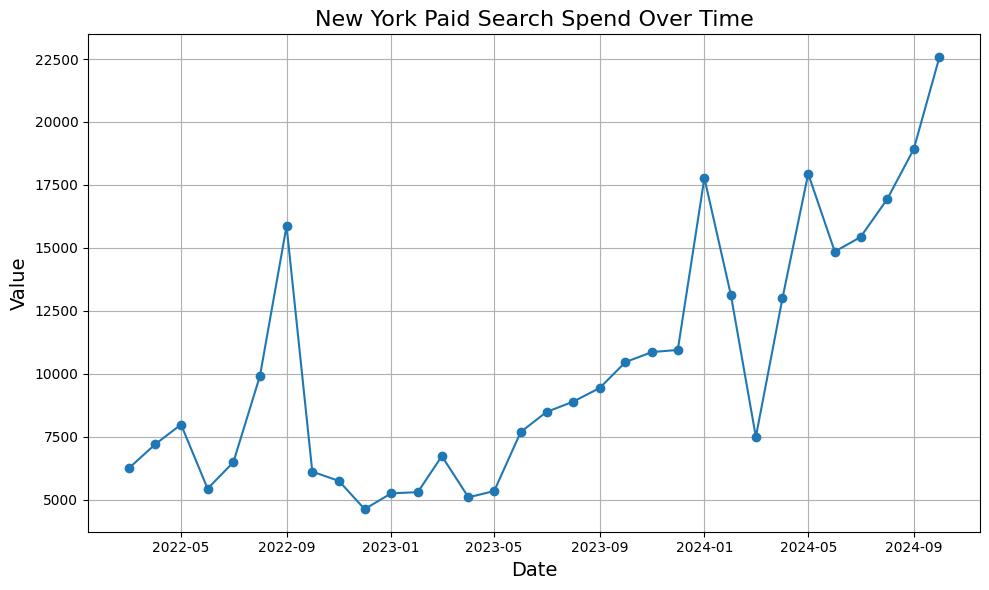

In [36]:

import matplotlib.pyplot as plt

df_series = df_final2.reset_index()

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df_series['year_month'], df_series['SPEND'], marker='o')

# Customize the plot
plt.title(f'{MSA_MARKET} Paid Search Spend Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.savefig(fname = f'{MSA_MARKET} Paid Search Over Time')
# Show the plot
plt.show()

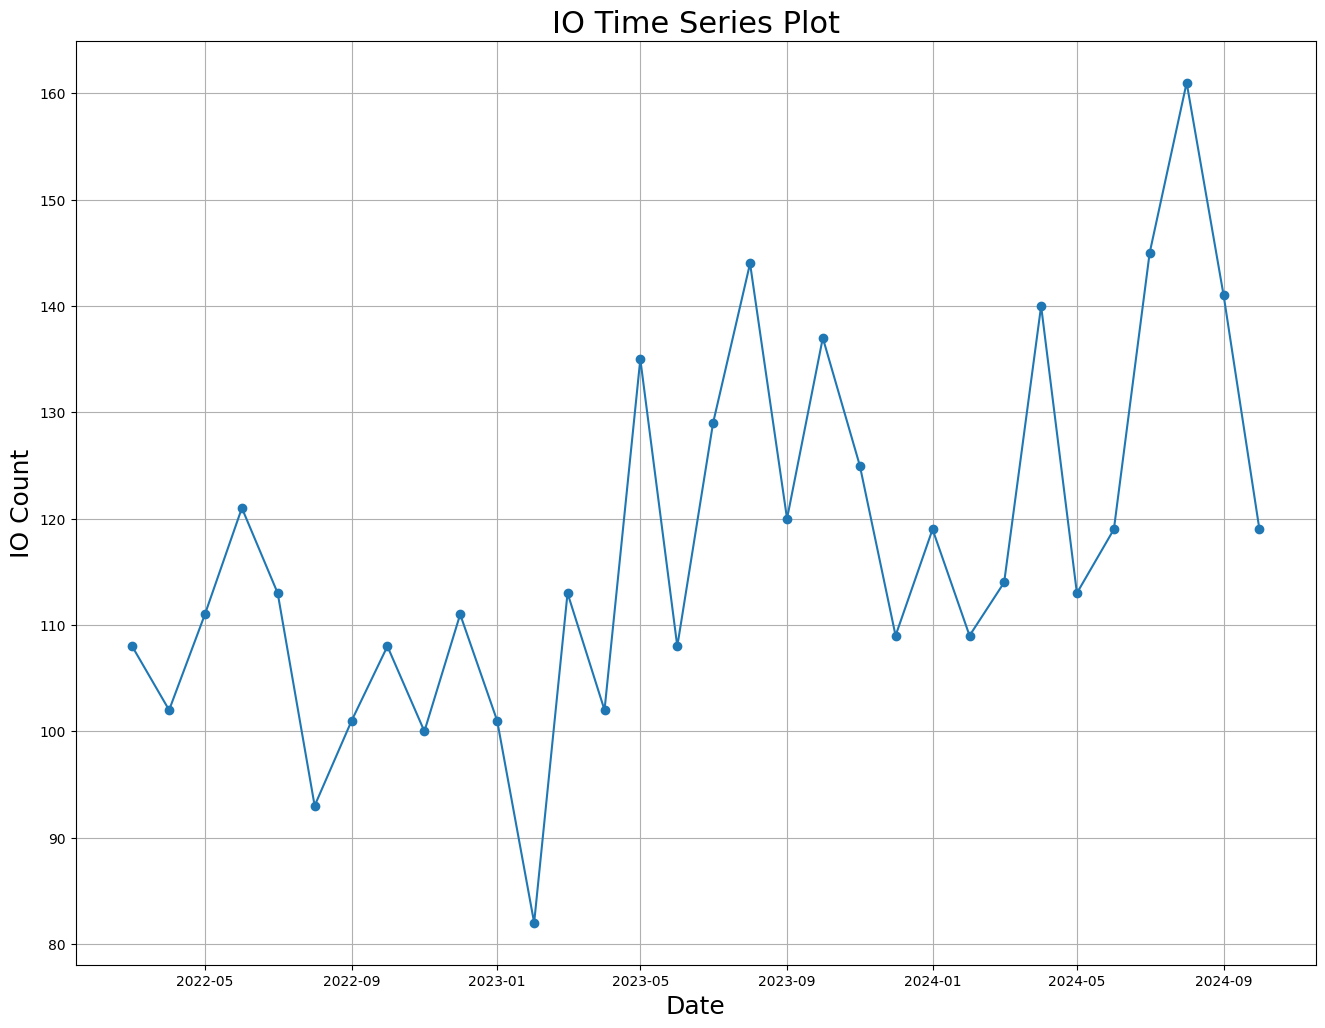

In [37]:
# Plot time series
#plt.plot(df_series['io_count'])


plt.figure(figsize=(16, 12))
plt.plot(df_series['year_month'], df_series['io_count'], marker='o')
plt.title('IO Time Series Plot', fontsize = 22)
plt.xlabel('Date', fontsize=18)
plt.ylabel('IO Count', fontsize=18)
plt.grid(True)
plt.savefig(fname = f'{MSA_MARKET} IOs Over Time ')
plt.show()

In [38]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_series['io_count'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -3.3040706117624286
p-value: 0.0146974956632388


<Figure size 1000x600 with 0 Axes>

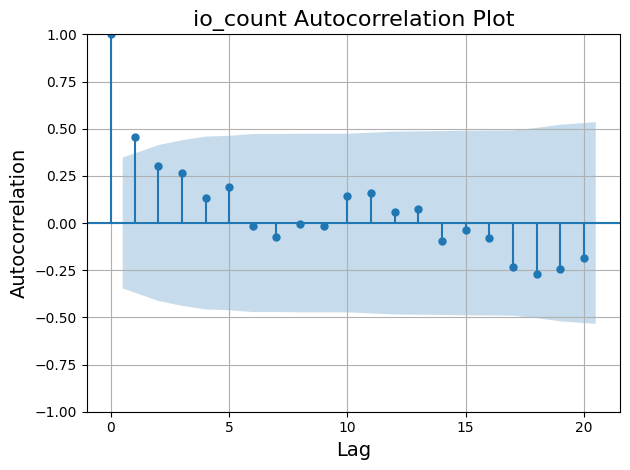

In [39]:
from statsmodels.graphics.tsaplots import plot_acf
# Plot autocorrelation
plt.figure(figsize=(10, 6))
plot_acf(df_series['io_count'], lags=20)  # Specify number of lags
plt.title('io_count Autocorrelation Plot', fontsize=16)
plt.xlabel('Lag', fontsize=14)
plt.ylabel('Autocorrelation', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

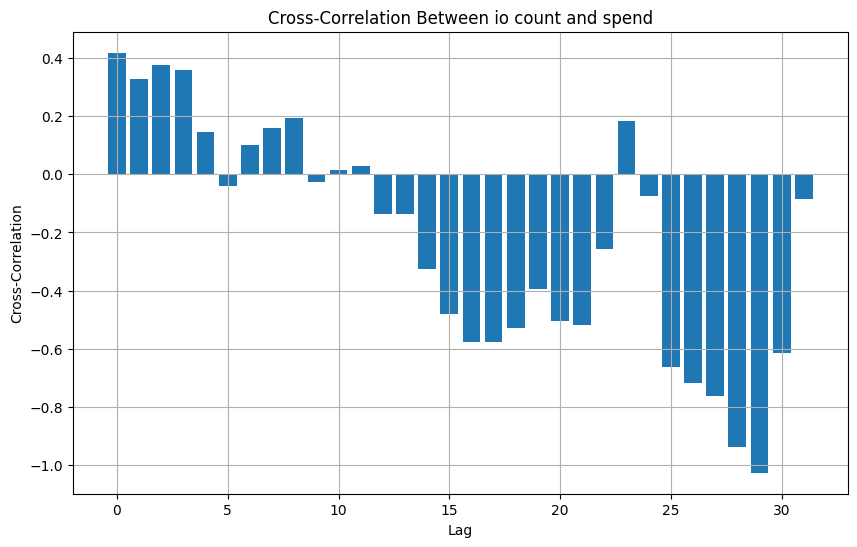

In [40]:
from statsmodels.tsa.stattools import ccf

# Compute cross-correlation between two features
cross_corr = ccf(df_series['io_count'], df_series['SPEND'])

# Plot the cross-correlation
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(range(len(cross_corr)), cross_corr)
plt.title('Cross-Correlation Between io count and spend')
plt.xlabel('Lag')
plt.ylabel('Cross-Correlation')
plt.grid()
plt.show()

In [41]:
#adding lags
df_final2.head()

,io_count,intervention,t,month,direct_search_sum,SPEND,IMPRESSIONS,CLICKS
year_month,,,,,,,,
2022-03-01,108,False,9,3,3264,6239.42,8859,2059
2022-04-01,102,False,10,4,2716,7198.64,8942,2091
2022-05-01,111,False,11,5,2290,7981.32,8244,1900
2022-06-01,121,False,12,6,3770,5433.70,7898,1864
2022-07-01,113,False,13,7,83132,6483.18,7360,1860


In [42]:
k = 1
df_final3 = df_final2.copy()
df_final3['lag_SPEND'] = df_final3['SPEND'].shift(k)
df_final3['lag_direct_search_sum'] = df_final3['direct_search_sum'].shift(k)
df_final3['lag_IMPRESSIONS'] = df_final3['IMPRESSIONS'].shift(k)
df_final3['lag_io_count'] = df_final3['io_count'].shift(k)
df_final3 = df_final3.dropna()
df_final3.head()

,io_count,intervention,t,month,direct_search_sum,SPEND,IMPRESSIONS,CLICKS,lag_SPEND,lag_direct_search_sum,lag_IMPRESSIONS,lag_io_count
year_month,,,,,,,,,,,,
2022-04-01,102,False,10,4,2716,7198.64,8942,2091,6239.42,3264.0,8859.0,108.0
2022-05-01,111,False,11,5,2290,7981.32,8244,1900,7198.64,2716.0,8942.0,102.0
2022-06-01,121,False,12,6,3770,5433.70,7898,1864,7981.32,2290.0,8244.0,111.0
2022-07-01,113,False,13,7,83132,6483.18,7360,1860,5433.70,3770.0,7898.0,121.0
2022-08-01,93,False,14,8,133221,9912.21,7651,1941,6483.18,83132.0,7360.0,113.0


In [43]:
df_final3.tail()

,io_count,intervention,t,month,direct_search_sum,SPEND,IMPRESSIONS,CLICKS,lag_SPEND,lag_direct_search_sum,lag_IMPRESSIONS,lag_io_count
year_month,,,,,,,,,,,,
2024-06-01,119,False,36,6,135255,14850.53,5820,2132,17942.74,148317.0,5906.0,113.0
2024-07-01,145,False,37,7,132761,15427.24,5246,2025,14850.53,135255.0,5820.0,119.0
2024-08-01,161,True,38,8,138437,16929.15,4749,1986,15427.24,132761.0,5246.0,145.0
2024-09-01,141,True,39,9,165727,18918.25,5633,2668,16929.15,138437.0,4749.0,161.0
2024-10-01,119,True,40,10,137832,22583.98,5427,2327,18918.25,165727.0,5633.0,141.0


In [44]:
import causalpy as cp

seed=42
result4 = cp.InterruptedTimeSeries(
    data=df_final3,
    treatment_time=pd.Timestamp(intervention_date),
    formula="io_count ~ 1 + t + C(month) + direct_search_sum + SPEND + IMPRESSIONS + \
         + lag_io_count",
    model=cp.pymc_models.LinearRegression(sample_kwargs={"random_seed": seed}),
)

Auto-assigning NUTS sampler...


Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)


NUTS: [beta, sigma]


/Users/lmola/.pyenv/versions/3.11.7/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 9 seconds.


The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details


Sampling: [beta, sigma, y_hat]


Sampling: [y_hat]


Sampling: [y_hat]


Sampling: [y_hat]


Sampling: [y_hat]


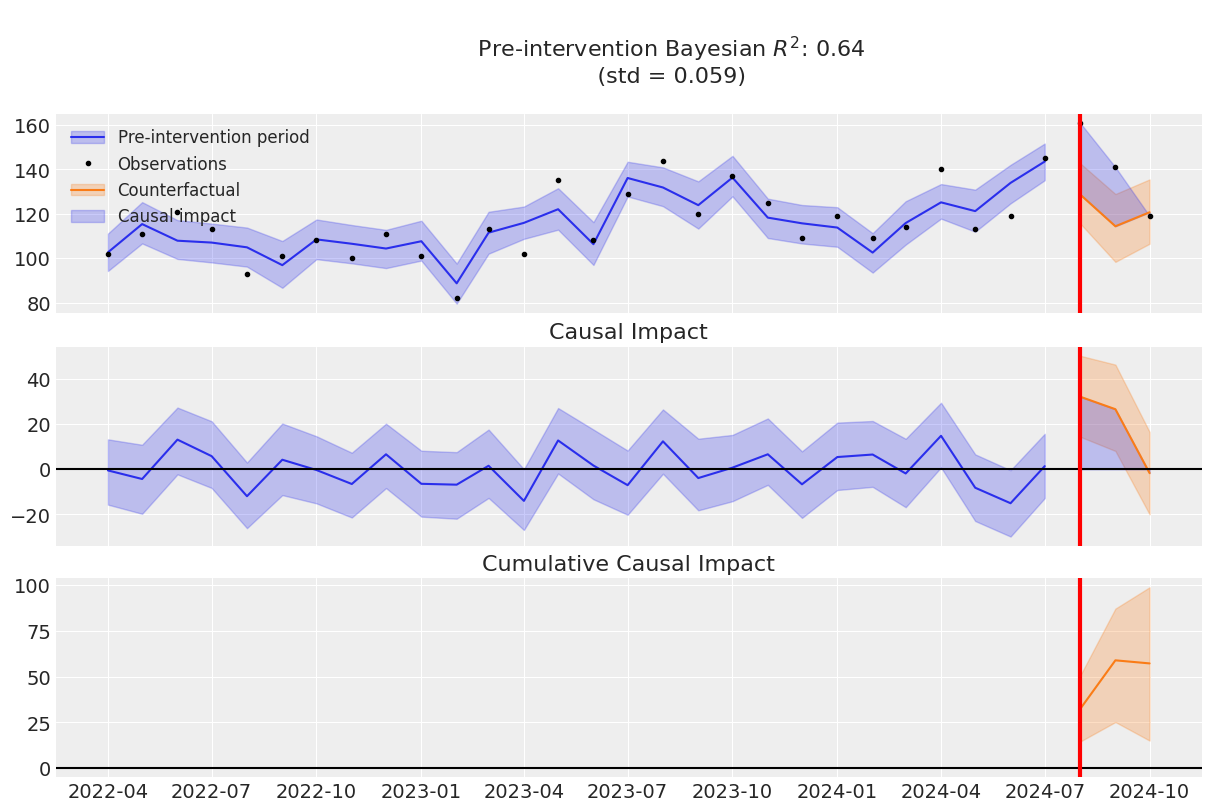

In [45]:
fig4, ax = result4.plot()

# Adjust the figure size
fig4.set_size_inches(12, 8)  # Example: Width = 12 inches, Height = 8 inches

Causal Graph for New York saved as New York_plot.png


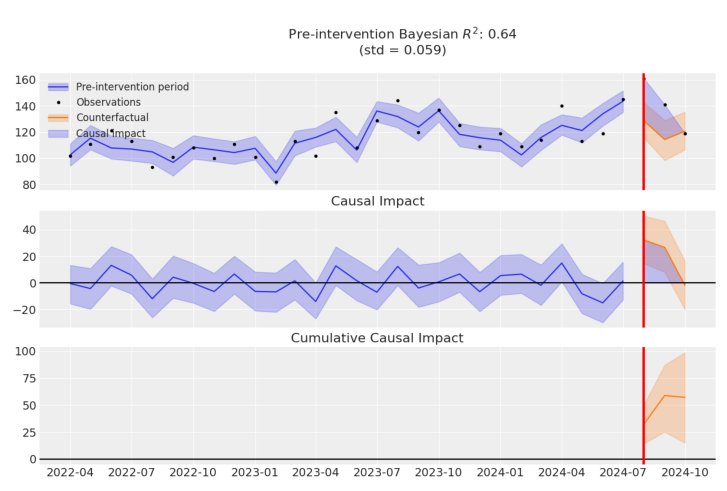

In [46]:
import matplotlib.image as mpimg



fig4.savefig(f"{MSA_MARKET}_causal_impact_plot.png")
plt.close()  # Close the figure to avoid overwriting
print(f"Causal Graph for {MSA_MARKET} saved as {MSA_MARKET}_plot.png")
plt.axis('off')  # Turn off axes for better visualization
img = mpimg.imread(f"{MSA_MARKET}_plot.png")#
plt.imshow(img)

In [47]:
# List all attributes and methods of the model object
print(dir(result4))

['__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_x_design_info', '_y_design_info', 'bayesian_plot', 'datapost', 'datapre', 'expt_type', 'formula', 'idata', 'input_validation', 'labels', 'model', 'ols_plot', 'outcome_variable_name', 'plot', 'post_X', 'post_impact', 'post_impact_cumulative', 'post_pred', 'post_y', 'pre_X', 'pre_impact', 'pre_pred', 'pre_y', 'print_coefficients', 'score', 'summary', 'supports_bayes', 'supports_ols', 'treatment_time']


In [48]:
pre_pred_samples = result4.pre_pred.posterior_predictive["y_hat"]
print(pre_pred_samples)  # Check the structure

<xarray.DataArray 'y_hat' (chain: 4, draw: 1000, obs_ind: 28)> Size: 896kB
array([[[108.24727425, 121.25149063, 104.40726766, ..., 119.9059474 ,
         131.1332332 , 144.8914837 ],
        [ 93.88993052, 114.51733583, 104.14188103, ..., 111.46107556,
         149.68111092, 142.75648123],
        [107.26012779, 133.6989698 , 105.28560691, ..., 128.58800798,
         121.51358269, 136.89556973],
        ...,
        [105.44473098, 127.678608  , 126.95150008, ..., 125.29602105,
         147.37661166, 141.94337195],
        [103.77961359, 117.36716796, 111.36846193, ..., 113.3116643 ,
         136.94540442, 137.76502845],
        [109.95605446, 121.25142785, 111.02999284, ..., 120.27155281,
         146.91137028, 139.89364429]],

       [[111.85849291, 132.65602094, 105.88477382, ..., 122.3853598 ,
         127.34692372, 148.30238102],
        [ 94.73704617, 111.95868902, 108.06677334, ..., 119.83615123,
         144.44386239, 148.93019059],
        [105.35095996, 122.53460985, 120.96758

In [49]:
# Compute the mean prediction across posterior samples
pre_pred_mean = pre_pred_samples.mean(dim="draw")
pre_pred_mean


<xarray.DataArray 'y_hat' (chain: 4, obs_ind: 28)> Size: 896B
array([[102.28340239, 115.35393949, 107.81899513, 107.45186775,
        104.98827252,  96.61657123, 108.66897371, 105.94622793,
        104.56374526, 107.67079477,  88.57145026, 111.21149242,
        115.73812485, 121.77643188, 105.84065894, 135.62334408,
        131.64000188, 123.76758569, 135.88985054, 118.32614914,
        115.66386605, 113.70649338, 102.13402609, 115.96683346,
        125.40374588, 120.93117274, 133.93382237, 143.44072052],
       [102.92680431, 115.03311557, 107.61073655, 107.47754814,
        105.08694445,  96.79886364, 108.16377798, 106.61902122,
        104.17862146, 107.48042358,  89.12792838, 111.62362387,
        116.23914026, 122.16697648, 106.92019229, 136.11921721,
        131.53761194, 123.23634543, 136.02434842, 118.42402312,
        115.65306261, 113.6907047 , 102.76980291, 115.82772124,
        124.91604938, 121.65187066, 133.75172328, 143.81984432],
       [102.50314779, 115.53163721, 107.88207913, 106.75968769,
        105.23431758,  96.78327437, 108.28815036, 106.77401855,
        104.43499778, 107.26508736,  88.50806842, 111.52220252,
        115.83525867, 122.46267655, 106.27775393, 136.23756514,
        131.5175264 , 124.38356536, 136.95703813, 118.25428471,
        115.70817124, 113.49531918, 102.32210215, 115.5432201 ,
        125.04920792, 120.83965532, 134.26512445, 143.6373623 ],
       [102.23781093, 115.26479163, 108.00619894, 106.96088886,
        104.42368989,  96.79220719, 108.151441  , 106.71896581,
        104.16471416, 107.29559046,  89.02990819, 111.32957581,
        116.22964593, 122.36460445, 106.24492486, 136.14218763,
        131.63914458, 124.1175579 , 136.18248653, 118.32053659,
        115.55130804, 113.32583943, 102.52526025, 116.0342366 ,
        125.14913667, 121.27473299, 134.23232631, 143.50092983]])
Coordinates:
  * chain    (chain) int64 32B 0 1 2 3
  * obs_ind  (obs_ind) int64 224B 0 1 2 3 4 5 6 7 8 ... 20 21 22 23 24 25 26 27

In [50]:
import arviz as az

az.summary(result4.post_impact.max("obs_ind"))
az.summary(result4.pre_pred.posterior_predictive["y_hat"].mean("obs_ind"))

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
y_hat,115.119,1.644,111.883,118.086,0.026,0.019,3907.0,3540.0,1.0


In [51]:
az.summary(result4.post_impact.max("obs_ind"))

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x,34.331,8.876,17.639,50.576,0.191,0.135,2153.0,2725.0,1.0


In [52]:
# get index of the final time point
index_4 = result4.post_impact_cumulative.obs_ind.max()
# grab the posterior distribution of the cumulative impact at this final time point
last_cumulative_estimate_4 = result4.post_impact_cumulative.sel({"obs_ind": index_4})
# get summary stats
az.summary(last_cumulative_estimate_4, hdi_prob=0.9)

,mean,sd,hdi_5%,hdi_95%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x,57.213,22.262,22.402,95.257,0.504,0.356,1955.0,2732.0,1.0


In [53]:
from scipy.stats import norm

# Inputs
estimate = 56.046
lower_ci = 19.697
upper_ci = 93.348
z_critical = 1.645  # For a 90% confidence interval

# Calculate standard error
se = (upper_ci - lower_ci) / (2 * z_critical)

# Calculate z-score
z_score = estimate / se

# Calculate p-value
p_value = 2 * norm.sf(abs(z_score))
print(f"p-value: {p_value:.4f}")

p-value: 0.0123


In [54]:
# # get index of the final time point
# index_4 = result4.post_impact_cumulative.obs_ind.max()
# # grab the posterior distribution of the cumulative impact at this final time point
# last_cumulative_estimate_4 = result4.post_impact_cumulative.sel({"obs_ind": index_4})
# # get summary stats
# az.summary(last_cumulative_estimate_4, hdi_prob=0.9)

In [55]:
df_series.tail()

,year_month,io_count,intervention,t,month,direct_search_sum,SPEND,IMPRESSIONS,CLICKS
27,2024-06-01,119,False,36,6,135255,14850.53,5820,2132
28,2024-07-01,145,False,37,7,132761,15427.24,5246,2025
29,2024-08-01,161,True,38,8,138437,16929.15,4749,1986
30,2024-09-01,141,True,39,9,165727,18918.25,5633,2668
31,2024-10-01,119,True,40,10,137832,22583.98,5427,2327


In [56]:
#number of intervention periods
int_periods = df_series['intervention'].sum()

#rows with intervention
intervention_df = df_series.tail(int_periods)

int_dates = intervention_df[['year_month', 'io_count']].reset_index(drop=True)
int_dates['treatment_region'] = MSA_MARKET
# Add a column with the index number
int_dates['Index_Number'] = int_dates.index

int_dates.head()

,year_month,io_count,treatment_region,Index_Number
0,2024-08-01,161,New York,0
1,2024-09-01,141,New York,1
2,2024-10-01,119,New York,2


In [57]:
int_dates.iloc[0][0]

/var/folders/sb/n8yqrs6n7y9ghs7jf_2n7h280000gp/T/ipykernel_94973/3285902388.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  int_dates.iloc[0][0]


Timestamp('2024-08-01 00:00:00')

In [58]:
for i in range(int_periods):
    if i ==0:
        az_df = pd.DataFrame(az.summary(result4.post_impact.sel({"obs_ind": i}), hdi_prob=0.9))
    else:

        # Concatenate the row to the DataFrame
        #df = pd.concat([df, new_row], ignore_index=True)
        new_row = pd.DataFrame(az.summary(result4.post_impact.sel({"obs_ind": i}), hdi_prob = 0.9))
        az_df = pd.concat([az_df, new_row], ignore_index=True)
        #az_df.concat(pd.DataFrame(az.summary(result4.post_impact.sel({"obs_ind": i}))))

az_df['Index_Number'] = az_df.index
az_df['bayes_Stat_Sig'] = (~((az_df['hdi_5%'] < 0 )| (az_df['hdi_95%'] < 0)))
az_df.head()

az_join = pd.merge(int_dates, az_df, on = 'Index_Number', how = 'inner')
az_join['counter_io_count'] = az_join['io_count'] - az_join['mean']
az_join['perc_lift'] = round((az_join['io_count'] - az_join['counter_io_count'])/az_join['counter_io_count'], 4)

az_final = az_join[['Index_Number', 'year_month', 'treatment_region', 'io_count', \
    'counter_io_count', 'mean', 'sd','perc_lift', 'bayes_Stat_Sig', 'hdi_5%', 'hdi_95%','mcse_mean', 'mcse_sd' ]]

az_final =az_final.rename(columns = {'mean': 'bayes_uplift'})
az_final.head()


,Index_Number,year_month,treatment_region,io_count,counter_io_count,bayes_uplift,sd,perc_lift,bayes_Stat_Sig,hdi_5%,hdi_95%,mcse_mean,mcse_sd
0,0,2024-08-01,New York,161,128.768,32.232,9.555,0.2503,True,16.459,47.950,0.191,0.135
1,1,2024-09-01,New York,141,114.334,26.666,10.150,0.2332,True,8.770,42.152,0.217,0.153
2,2,2024-10-01,New York,119,120.685,-1.685,9.768,-0.0140,False,-17.443,14.365,0.178,0.126


In [59]:
# Save with the index column
az_final.to_csv(f"{MSA_MARKET}_monthly_uplift.csv", index=True)

In [60]:
# get index of the final time point
index_4 = result4.post_impact_cumulative.obs_ind.max()
# grab the posterior distribution of the cumulative impact at this final time point
last_cumulative_estimate_4 = result4.post_impact_cumulative.sel({"obs_ind": index_4})
# get summary stats
az.summary(last_cumulative_estimate_4, hdi_prob=0.9)

az_cumulative = az.summary(last_cumulative_estimate_4, hdi_prob=0.9)

In [61]:
int_dates

,year_month,io_count,treatment_region,Index_Number
0,2024-08-01,161,New York,0
1,2024-09-01,141,New York,1
2,2024-10-01,119,New York,2


In [62]:
result = int_dates.agg(
    treatment_start = ("year_month", "min"),
    treatment_end = ("year_month", "max"),
    io_sum = ("io_count", "sum")
).reset_index()

In [63]:
result

,index,year_month,io_count
0,treatment_start,2024-08-01,NaN
1,treatment_end,2024-10-01,NaN
2,io_sum,NaT,421.0


In [64]:
int_dates['io_count'].sum()

421

In [65]:
az_cumulative.head()

,mean,sd,hdi_5%,hdi_95%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x,57.213,22.262,22.402,95.257,0.504,0.356,1955.0,2732.0,1.0


In [66]:
#adjust the cumulative table

#az_cumulative['Index_Number'] = az_df.index
az_cumulative['bayes_Stat_Sig'] = (~((az_cumulative['hdi_5%'] < 0 )| (az_cumulative['hdi_95%'] < 0)))
#az_cumulative.head()
az_cumulative['io_sum'] = int_dates['io_count'].sum()
az_cumulative['counter_io_sum'] = az_final['counter_io_count'].sum()
az_cumulative['treatment_region'] = MSA_MARKET
az_cumulative['treatment_start'] = int_dates['year_month'].min()
az_cumulative['treatment_end'] = int_dates['year_month'].max()
#az_cumulative_join = pd.merge(az_cumulative_final, az_cumulative, on = 'Index_Number', how = 'inner')

#az_cumulative['counter_io_count'] = az_cumulative_join['io_count'] - az_join['mean']
az_cumulative['perc_lift'] = round((az_cumulative['io_sum'] - \
    az_cumulative['counter_io_sum'])/az_cumulative['counter_io_sum'], 4)

az_cumulative_final = az_cumulative[['treatment_region', 'treatment_start', 'treatment_end', \
    'io_sum', 'counter_io_sum', 'mean', 'sd','perc_lift', 'bayes_Stat_Sig', 'hdi_5%', 'hdi_95%','mcse_mean', 'mcse_sd' ]]

az_cumulative_final =az_cumulative_final.rename(columns = {'mean': 'bayes_uplift'})
az_cumulative_final.head()

,treatment_region,treatment_start,treatment_end,io_sum,counter_io_sum,bayes_uplift,sd,perc_lift,bayes_Stat_Sig,hdi_5%,hdi_95%,mcse_mean,mcse_sd
x,New York,2024-08-01,2024-10-01,421,363.787,57.213,22.262,0.1573,True,22.402,95.257,0.504,0.356


In [67]:
# Save with the index column
az_cumulative_final.to_csv(f"{MSA_MARKET}_cumulative_uplift.csv", index=True)